In [1]:
import os
import earthpy as et
import common_functions as common
import DEM_Processing as dem_process

home_dir = os.path.join(et.io.HOME, 'earth-analytics')
data_dir = os.path.join(home_dir, 'data')
original_DEM_data_dir = os.path.join(data_dir, 'original', 'dem')

modified_data_dir = os.path.join(data_dir, 'modified')
os.chdir(data_dir)

Completed download of dem data.


# DEM Analysis

## Purpose
* Determine the correlation between slope/aspect and avalanche paths through an aggregate avalanche danger score.
* Determine whether there are known avalanche paths that may retrigger a slide more often based on danger values.

   
## Methods
* Find the 2km x 2km DEM tiles of 2m LIDAR DEM data that correspond to our study area from Utah AGRC (raster.utah.gov)
* Download the raw DEM data in ascii format
* Merge rectangular groups of tiles together to form intermediate images.
* For intermediate image:
    - Mask nodata values
    - Write the new array to an intermediate geotiff file.
* Merge the intermediate geotiff files together using rasterio to create our final DEM array.
* Plot DEM data (see _DEM Figure 1_)
* Calculate slope and aspect using the built-in DEM analysis tools in richdem
    - Plot Slope values (see _DEM Figure 2_)
    - Plot Aspect values (see _DEM Figure 3_)
* Calculate an avalanche danger score using a weighted average of slope and aspect for each pixel.
    - 75% weight on slope:
        - Values between 0-25 and 55+: 1 (Lowest danger)
        - Values between 25-35 and 45-55: 2 (Medium danger)
        - Values between 35-45: 3 (Highest danger)
    - 25% weight on aspect
        - Values between 0-45, 315-360: 3 (North, highest danger)
        - Values between 45-225: 2 (South and East, medium danger)
        - Values between 225-315: 1 (West, lowest danger)
* Reclassify the avalanche danger score raster using np.digitize to five distinct buckets
* Plot reclassified danger score over the avalanche shapefiles (See _DEM Figure 4_) to determine if there is a visually higher danger score within the known avalanche paths.
* On the same plot (See _DEM Figure 4_), plot the site of 117 avalanches from the 2011, 2014, and 2017 season to determine if the starting point of the field sites correlate with areas of higher danger
* Determine the mean danger score within each avalanche path and plot them on a ranked scale with yellow being the lowest and red being the highest mean danger score:
    - Merge the shapefile metadata to the avalanche paths dataframe using site area as the key.
    - Using rasterstats, calculate the mean danger score within each shapefile
    - Plot using the above scale (See _DEM Figure 5_)
    
    
## Sources of Uncertainty and Noise
* Additional types of DEM analysis (curvature in particular)
* Mean average danger score incorporates more than the start zone of the avalanche 
* Lack of data coverage in the southeast quadrant of our study area

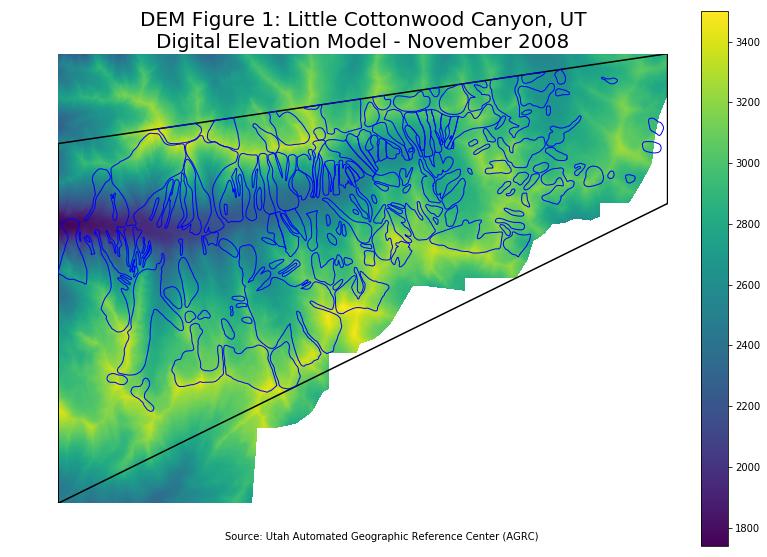

In [2]:
output_file = os.path.join(modified_data_dir, "Final.tif")
image = dem_process.DEM_Plot(output_file)[0]

## DEM Fig. 1
This plot shows the digital elevation model in our study area. The overlayed avalanche shapes show a visual indication that many of these slides take place from the peaks on either side of Highway 210 down to the valley.

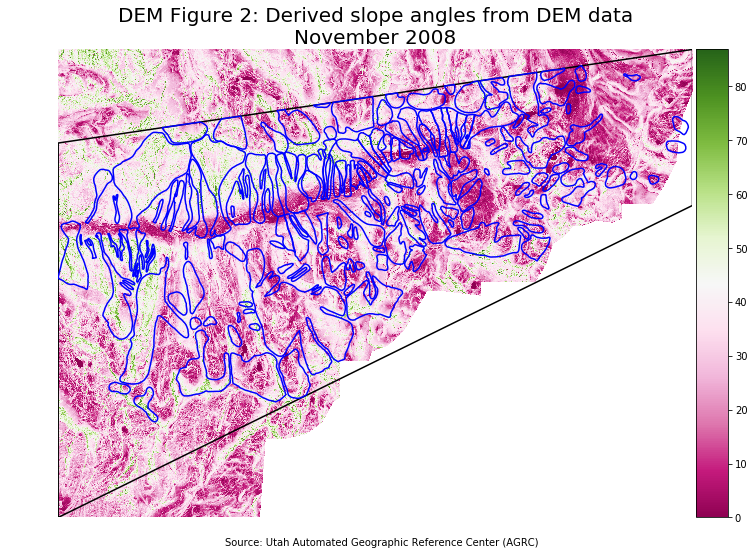

In [3]:
slope_ma = dem_process.Slope_Plot(output_file)[1]

## DEM Fig. 2
This plot shows the slope angles within our study area. Of note is that many of the avalanche paths enclose areas that have higher slope angles (40-50 degrees), which is consistent with the understanding of which slope angles are prone to slide more than others.

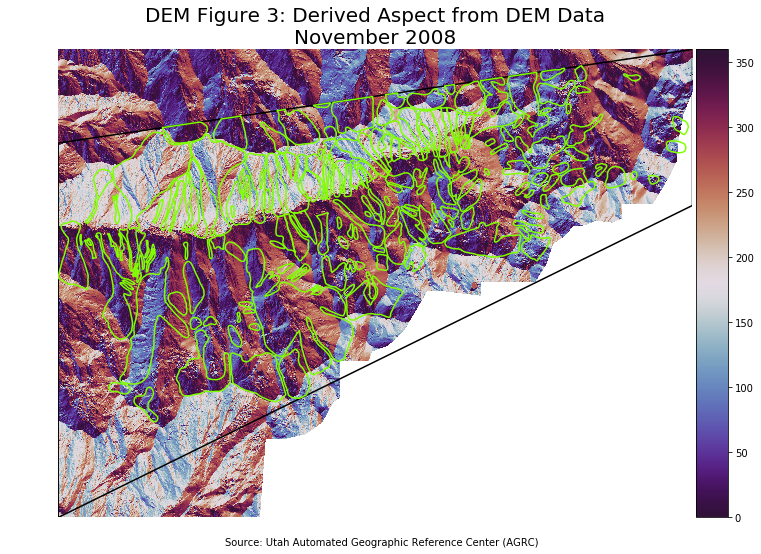

In [4]:
aspect_ma = dem_process.Aspect_Plot(output_file)[1]

## DEM Fig. 3
This plot shows the hill aspect within our study area. Many of the avalanche paths take place on the south-facing side of Little Cottonwood Canyon, but the overall coverage of the paths over our study area limits the useful analysis possible based on whether a specific slope is prone to slide.

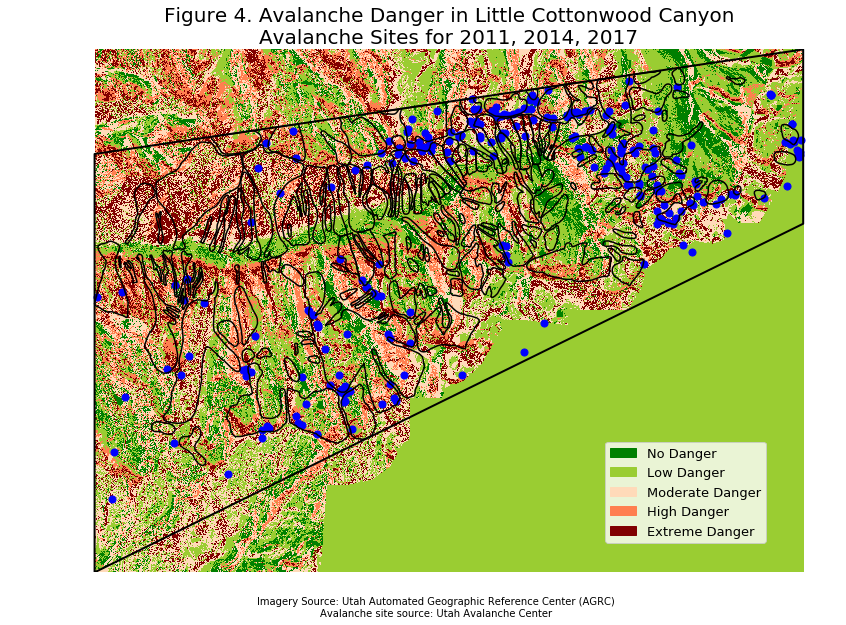

In [5]:
avy_danger_class = dem_process.Danger_Plot(slope_ma,aspect_ma)

## DEM Fig. 4
This plot shows the avalanche danger score across our study area. There is a higher danger overall on the slopes immediately above the canyon floor, and some of the slide paths fill neatly into higher areas of overall danger, which shows that slope and aspect combined using our formula is at least able to correlate with previous avalanche areas. The blue dots on the plot represent 117 prior avalanches from field studies. The location of the dot is the start zone of the avalanche, and there does seem to be a general correlation between the start zone and the higher danger score near the start zone of the known avalanche paths.

/anaconda3/envs/earth-analytics-python/lib/python3.6/site-packages/rasterstats/io.py:294: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")


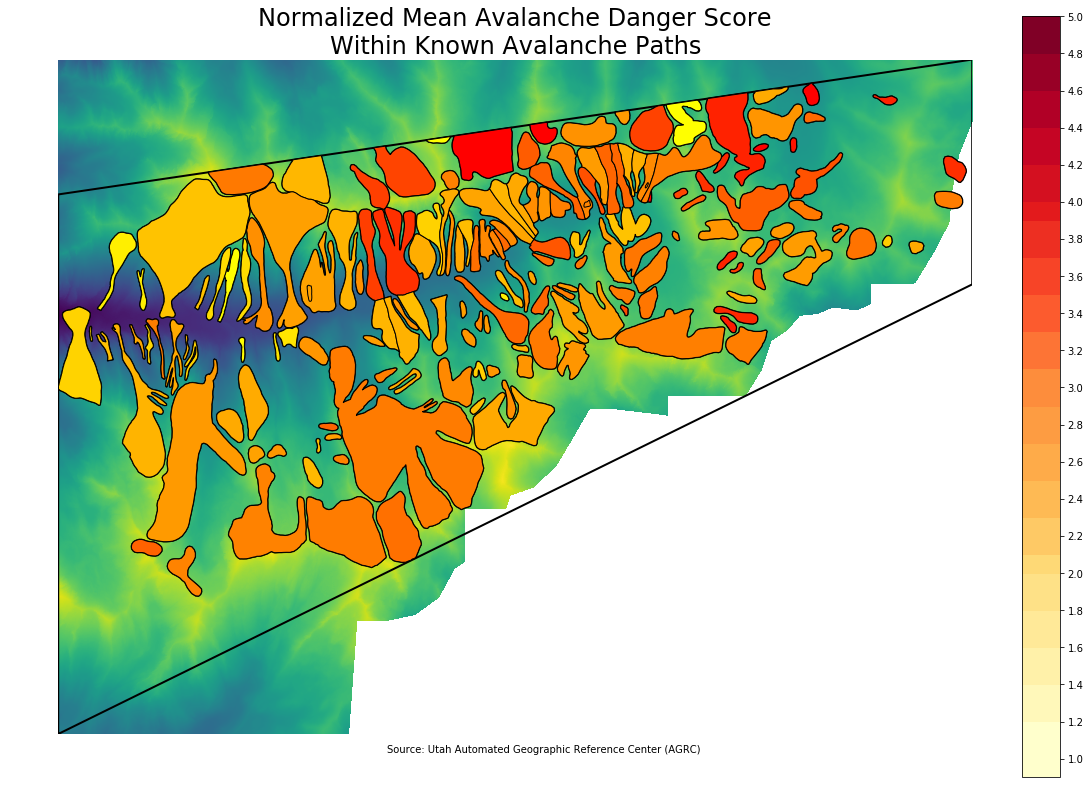

In [6]:
mean_danger = dem_process.Mean_Danger(avy_danger_class)
dem_process.Normalized_mean_danger(image, mean_danger)

## DEM Fig. 5
This plot shows the mean danger score within each avalanche path, and the scores are plotted on a yellow to red scale. Some of the highest mean scores were from the avalanches on the north edge of our study area, near the peaks of the mountains on the north side of the canyon. Comparing it to the slope and aspect profiles, we can see that most of these areas have higher slope angles as well as facing north. We were aiming to determine which avalanche paths we could study further during our NDVI analysis using this DEM analysis, but due to time constraints, we were not able to leverage this data.